In [9]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4_3D, ErrorCode, Field
from glob import glob
import numpy as np
from datetime import timedelta
from os import path

import xarray as xr
import matplotlib.pyplot as plt


import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [20]:
data_path = '../data/NEMO/'
output_path = '../data/test.nc'
ufiles = sorted(glob(data_path+'ORCA*U.nc'))
vfiles = sorted(glob(data_path+'ORCA*V.nc'))
wfiles = sorted(glob(data_path+'ORCA*W.nc'))
mesh_mask = data_path + 'coordinates.nc'

In [21]:
filenames = {'U': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': ufiles},
             'V': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': vfiles},
             'W': {'lon': mesh_mask,
                   'lat': mesh_mask,
                   'depth': wfiles[0],
                   'data': wfiles}}

variables = {'U': 'uo',
             'V': 'vo',
             'W': 'wo'}
dimensions = {'U': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'V': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'},
              'W': {'lon': 'glamf',
                    'lat': 'gphif',
                    'depth': 'depthw',
                    'time': 'time_counter'}}

indices = {'lat': range(500, 1400), 'lon': range(2500, 3800)}

In [22]:
fieldset = FieldSet.from_nemo(filenames, variables, dimensions,
                             allow_time_extrapolation=True, indices=indices)

         It will be opened with no decoding. Filling values might be wrongly parsed.
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'wo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'difvho' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedel

In [34]:
Field()

parcels.field.Field

In [32]:
fieldset.V.grid.depth

array([0.0000000e+00, 1.0239066e+00, 2.1031899e+00, 3.2513092e+00,
       4.4850526e+00, 5.8252378e+00, 7.2974429e+00, 8.9326859e+00,
       1.0767898e+01, 1.2845992e+01, 1.5215269e+01, 1.7927923e+01,
       2.1037571e+01, 2.4595987e+01, 2.8649651e+01, 3.3236965e+01,
       3.8387100e+01, 4.4121010e+01, 5.0454468e+01, 5.7402565e+01,
       6.4984604e+01, 7.3228699e+01, 8.2175560e+01, 9.1881409e+01,
       1.0242017e+02, 1.1388524e+02, 1.2639093e+02, 1.4007397e+02,
       1.5509505e+02, 1.7164024e+02, 1.8992279e+02, 2.1018446e+02,
       2.3269698e+02, 2.5776288e+02, 2.8571579e+02, 3.1691986e+02,
       3.5176801e+02, 3.9067862e+02, 4.3409055e+02, 4.8245633e+02,
       5.3623322e+02, 5.9587207e+02, 6.6180524e+02, 7.3443213e+02,
       8.1410565e+02, 9.0111798e+02, 9.9568854e+02, 1.0979541e+03,
       1.2079630e+03, 1.3256725e+03, 1.4509504e+03, 1.5835824e+03,
       1.7232798e+03, 1.8696931e+03, 2.0224249e+03, 2.1810444e+03,
       2.3451011e+03, 2.5141372e+03, 2.6876995e+03, 2.8653469e

In [50]:
pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle,
                             lon=[0.35],
                             lat=[-38.13],
                             depth=1)

In [51]:
def delete_particle(particle, fieldset, time):
    particle.delete()


In [52]:
kernels = pset.Kernel(AdvectionRK4_3D)

In [53]:
# Output file
output_file = pset.ParticleFile(name=output_path,
                                outputdt=timedelta(hours=1))

Exception ignored in: <bound method ParticleFileSOA.__del__ of <parcels.particlefile.particlefilesoa.ParticleFileSOA object at 0x7faf0f1982e8>>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/parcels-2.2.3.dev333+gc7504ad2-py3.6.egg/parcels/particlefile/particlefilesoa.py", line 40, in __del__
    super(ParticleFileSOA, self).__del__()
  File "/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/parcels-2.2.3.dev333+gc7504ad2-py3.6.egg/parcels/particlefile/baseparticlefile.py", line 235, in __del__
    self.close()
  File "/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/parcels-2.2.3.dev333+gc7504ad2-py3.6.egg/parcels/particlefile/baseparticlefile.py", line 240, in close
    self.export()
  File "/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/parcels-2.2.3.dev333+gc7504ad2-py3.6.egg/parcels/particlefile/particlefilesoa.py", line 137, in export
    data = self.read_from_npy(global_file_list, len(s

In [54]:
pset.execute(kernels,
             output_file=output_file,
             runtime=timedelta(days=1),
             dt=timedelta(hours=1),
            recovery={ErrorCode.ErrorOutOfBounds: delete_particle})

output_file.close()


INFO: Compiled ArrayJITParticleAdvectionRK4_3D ==> /var/folders/1f/8_g77d295cx2k2wjwb6pkb480000gn/T/parcels-501/lib5f3a742e6917a04fc923365368771aa1_0.so
INFO: Temporary output files are stored in ../data/out-ODWEAIGM.
INFO: You can use "parcels_convert_npydir_to_netcdf ../data/out-ODWEAIGM" to convert these to a NetCDF file during the run.
100% (86400.0 of 86400.0) |##############| Elapsed Time: 0:00:19 Time:  0:00:19


In [2]:
ufield = xr.load_dataset('../data/NEMO/ORCA0083-N06_20070818d05U.nc')

/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'uo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/opt/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'tauuo' has multiple fill values {0.0, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [4]:
ufield

<xarray.Dataset>
Dimensions:               (depthu: 75, time_bounds: 2, time_counter: 1, x: 4322, y: 3059)
Coordinates:
    nav_lat               (y, x) float32 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
    nav_lon               (y, x) float32 72.92 73.0 73.08 ... 73.0 73.0 73.0
  * depthu                (depthu) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] 2007-08-16T12:00:00
  * time_counter          (time_counter) datetime64[ns] 2007-08-16T12:00:00
Dimensions without coordinates: time_bounds, x, y
Data variables:
    uo                    (time_counter, depthu, y, x) float32 nan nan ... nan
    time_centered_bounds  (time_counter, time_bounds) datetime64[ns] 2007-08-...
    time_counter_bounds   (time_counter, time_bounds) datetime64[ns] 2007-08-...
    tauuo                 (time_counter, y, x) float32 nan nan nan ... nan nan
Attributes:
    name:                 ORCA0083-N06_5d_20070401_20071231
    description:          ocean U grid variables
    conventions:          CF-1.1
    production:           An IPSL model
    timeStamp:            2015-Apr-25 13:27:24 BST
    ibegin:               1
    ni:                   4322
    jbegin:               1
    nj:                   39
    DOMAIN_number_total:  80
    DOMAIN_size_global:   [4322 3059]

In [6]:
particles = xr.load_dataset('../data/test2.nc')

In [7]:
particles

<xarray.Dataset>
Dimensions:     (obs: 193, traj: 1000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 0.0 0.0 0.0 0.0 ... 999.0 999.0 999.0 999.0
    time        (traj, obs) datetime64[ns] 2007-08-22T12:00:00 ... 2007-08-14...
    lat         (traj, obs) float64 -32.17 -32.16 -32.15 ... -32.98 -32.98
    lon         (traj, obs) float64 -6.283 -6.278 -6.273 ... -5.198 -5.21 -5.222
    z           (traj, obs) float64 70.0 69.96 69.92 69.87 ... 69.14 69.16 69.18
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.3.dev333+gc7504ad2
    parcels_mesh:           spherical

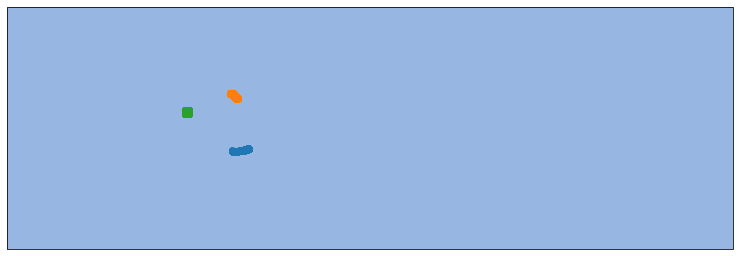

In [22]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-10, 5, -35, -30), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
# # ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.RIVERS)a

ax.scatter(particles['lon'][:,190], particles['lat'][:,190]);
ax.scatter(particles['lon'][:,80], particles['lat'][:,80]);
ax.scatter(particles['lon'][:,0], particles['lat'][:,0]);
# t = 24

# for j,n in enumerate(range(0, 1000000, 100000)):
#     #print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)
#     m = n+100000
#     ax.scatter(particles['lon'][:,t], particles['lat'][:,t], s=0.01);

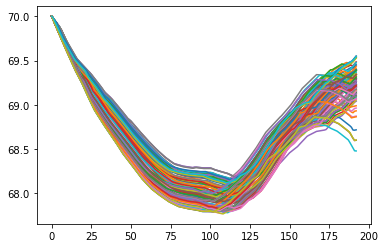

In [26]:
for i in range(0,100):
    plt.plot(particles['z'][i,:])

In [3]:
test_1 = xr.load_dataset('../data/test1.nc')